# 注意力提示
:label:`sec_attention-cues`

感谢你对本书的关注，因为注意力是一种稀缺的资源：此刻你正在阅读这本书而忽略了其他的书。因此，你的注意力是用机会成本（与金钱类似）来支付的。为了确保你现在投入的注意力是值得的，我们尽全力（全部的注意力）创作一本好书。

自经济学研究稀缺资源分配以来，我们正处在注意力经济时代，即人类的注意力被视为可以交换的、有限的、有价值的且稀缺的商品。许多商业模式也被开发出来去利用这个商业模式。在音乐或视频流媒体服务上，我们要么消耗注意力在广告上，要么付钱来隐藏广告。为了在网络游戏世界的成长，我们要么消耗注意力在战斗中，从而帮助吸引新的玩家，要么付钱立即变得强大。没什么是免费的。

总而言之，注意力在我们的环境中是稀缺的，而环境中的信息却并不少。在检查视觉场景时，我们的视觉神经系统大约每秒收到 $10^8$ 位的信息，这远远超过了大脑能够完全处理的水平。幸运的是，我们的祖先已经从经验（也称为数据）中认识到 *并非感官的所有输入都是一样的*。在整个人类历史中，这种只将注意力引向感兴趣的一小部分信息的能力，使我们的大脑能够更明智地分配资源来生存、成长和社交，例如发现天敌、找寻食物和伴侣。

## 生物学中的注意力提示

为了解释我们的注意力是如何在视觉世界中展开的，一个双组件（two-component）的框架应运而生，并得到了普及。这个框架的出现可以追溯到 19 世纪 90 年代的威廉·詹姆斯，他被认为是 “美国心理学之父” :cite:`James.2007` 。在这个框架中，受试者基于 *非自主性提示* 和 *自主性提示* 有选择地引导注意力的焦点。

非自主性提示是基于环境中物体的突出性和易见性。想象一下，你面前有五个物品：一份报纸、一篇研究论文、一杯咖啡、一本笔记本和一本书，就像 :numref:`fig_eye-coffee` 。所有纸制品都是黑白印刷的，但咖啡杯是红色的。换句话说，这杯咖啡在这种视觉环境中是突出和显眼的，自动而且不由自主地引起人们的注意。所以你把 fovea（黄斑中心，视力最敏锐的地方）放到咖啡上，如 :numref:`fig_eye-coffee` 所示。

![使用基于突出性的非自主性提示（红杯子，而非纸张），注意力不自主地指向了咖啡。](../img/eye-coffee.svg)
:width:`400px`
:label:`fig_eye-coffee`

喝咖啡后，你会变得兴奋并想读书。所以你转过头，重新聚焦你的眼睛，然后看看书，就像 :numref:`fig_eye-book` 中描述那样。与 :numref:`fig_eye-coffee` 中由于突出性导致选择会偏向于咖啡不同，此时选择书是受到了认知和意识的控制，因此注意力在基于自主性提示去辅助选择时将更为谨慎。受试者的主观意愿推动，选择的力量也就更强大。

![通过使用依赖于任务的意志提示（想读一本书），注意力被自主引导的书上。](../img/eye-book.svg)
:width:`400px`
:label:`fig_eye-book`

## 查询、键和值

自主性的与非自主性的注意力提示解释了注意力的方式，下面我们将描述设计注意力机制时的框架，框架中合并这两个注意力提示来设计注意力机制。

首先，考虑一个相对简单的状况，即只使用非自主性提示。要想将选择偏向于感官输入，我们可以简单地使用参数化的全连接层，甚至是非参数化的最大汇聚层或平均汇聚层。

因此，通过是否包含自主性提示将注意力机制与全连接层或汇聚层区别开来。在注意力机制的背景下，我们将自主性提示称为 *查询*（Queries）。给定任何查询，注意力机制通过 *注意力汇聚*（attention pooling）将选择偏向于 *感官输入*（sensory inputs，例如中间特征表示）。在注意力机制的背景下，这些感官输入被称为 *值*（Values）。更通俗的解释，每个值都与一个 *键*（Keys） 配对，这可以想象为感官输入的非自主提示。如 :numref:`fig_qkv` 所示，我们可以设计注意力汇聚，以便给定的查询（自主性提示）可以与键（非自主性提示）进行交互，这将引导将选择偏向于值（感官输入）。

![注意力机制通过注意力汇聚将 *查询*（自主性提示）和 *键*（非自主性提示）结合在一起，实现对 *值*（感官输入）的选择倾向。](../img/qkv.svg)
:label:`fig_qkv`

注意，注意力机制的设计有许多替代方案。例如，我们可以设计一个不可微的注意力模型，该模型可以使用强化学习方法 :cite:`Mnih.Heess.Graves.ea.2014` 进行训练。鉴于上面所提框架在 :numref:`fig_qkv` 中的主导地位，因此这个框架下的模型将成为本章我们关注的中心。

## 注意力的可视化

平均汇聚层可以被视为输入的加权平均值，其中各输入的权重是一样的。实际上，注意力汇聚得到的是加权平均的总和值，其中权重是在给定的查询和不同的键之间计算得出的。


In [1]:
import torch
from d2l import torch as d2l

为了可视化注意力权重，我们定义了 `show_heatmaps` 函数。其输入 `matrices` 的形状是 (要显示的行数，要显示的列数, 查询的数目, 键的数目)。


In [3]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

我们使用一个简单的例子进行演示。在本例子中，仅当查询和键相同时，注意力权重为1，否则为0。


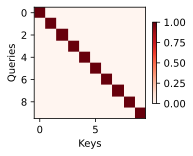

In [4]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

在后面的章节中，我们将经常调用此函数来显示注意力权重。

## 小结

* 人类的注意力是有限的、有价值和稀缺的资源。
* 受试者使用非自主性和自主性提示有选择性地引导注意力。前者基于突出性，后者则依赖于任务。
* 注意力机制与全连接层或者汇聚层的区别源于增加的自主提示。
* 由于包含了自主性提示，注意力机制与全连接的层或汇聚层不同。
* 注意力机制通过注意力汇聚使选择偏向于值（感官输入），其中包含查询（自主性提示）和键（非自主性提示）。键和值是成对的。
* 我们可以可视化查询和键之间的注意力权重。

## 练习

1. 在机器翻译中通过解码序列标记时，其自主性提示可能是什么？非自主性提示和感官输入又是什么？
1. 随机生成一个 $10 \times 10$ 矩阵并使用 `softmax` 运算来确保每行都是有效的概率分布，然后可视化输出注意力权重。


# 注意力汇聚：Nadaraya-Watson 核回归
:label:`sec_nadaraya-waston`

在知道了 :numref:`fig_qkv` 框架下的注意力机制的主要成分。回顾一下，查询（自主提示）和键（非自主提示）之间的交互形成了 **注意力汇聚**（attention pooling）。注意力汇聚有选择地聚合了值（感官输入）以生成最终的输出。在本节中，我们将介绍注意力汇聚的更多细节，以便从宏观上了解注意力机制在实践中的运作方式。具体来说，1964 年提出的 Nadaraya-Watson 核回归模型是一个简单但完整的例子，可以用于演示具有注意力机制的机器学习。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## [**生成数据集**]

简单起见，考虑下面这个回归问题：给定的成对的“输入－输出”数据集 $\{(x_1, y_1), \ldots, (x_n, y_n)\}$，如何学习 $f$ 来预测任意新输入 $x$ 的输出 $\hat{y} = f(x)$？

根据下面的非线性函数生成一个人工数据集，其中加入的噪声项为 $\epsilon$：

$$y_i = 2\sin(x_i) + x_i^{0.8} + \epsilon,$$

其中 $\epsilon$ 服从均值为 $0$ 和标准差为 $0.5$ 的正态分布。我们生成了 $50$ 个训练样本和 $50$ 个测试样本。为了更好地可视化之后的注意力模式，输入的训练样本将进行排序。


In [2]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)  # 训练样本的输入，在0-5之间

In [6]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

下面的函数将绘制所有的训练样本（样本由圆圈表示）、不带噪声项的真实数据生成函数 $f$（标记为“Truth”）和学习得到的预测函数（标记为“Pred”）。


In [7]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

## 平均汇聚

先使用可能是这个世界上“最愚蠢”的估计器来解决回归问题：基于平均汇聚来计算所有训练样本输出值的平均值：

$$f(x) = \frac{1}{n}\sum_{i=1}^n y_i,$$
:eqlabel:`eq_avg-pooling`

如下图所示，这个估计器确实不够聪明。


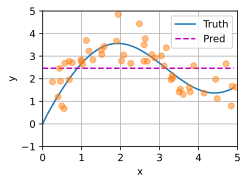

In [8]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

## [**非参数注意力汇聚**]

显然，平均汇聚忽略了输入 $x_i$。于是 Nadaraya :cite:`Nadaraya.1964` 和 Waston :cite:`Watson.1964` 提出了一个更好的想法，根据输入的位置对输出 $y_i$ 进行加权：

$$f(x) = \sum_{i=1}^n \frac{K(x - x_i)}{\sum_{j=1}^n K(x - x_j)} y_i,$$
:eqlabel:`eq_nadaraya-waston`

其中 $K$ 是 *核*（kernel）。公式 :eqref:`eq_nadaraya-waston` 所描述的估计器被称为 *Nadaraya-Watson 核回归*（Nadaraya-Watson kernel regression）。在这里我们不会深入讨论核函数的细节。回想一下 :numref:`fig_qkv` 中的注意力机制框架，我们可以从注意力机制的角度重写 :eqref:`eq_nadaraya-waston` 成为一个更加通用的 *注意力汇聚*（attention pooling）公式：

$$f(x) = \sum_{i=1}^n \alpha(x, x_i) y_i,$$
:eqlabel:`eq_attn-pooling`

其中 $x$ 是查询，$(x_i, y_i)$ 是键值对。比较 :eqref:`eq_attn-pooling` 和 :eqref:`eq_avg-pooling`，注意力汇聚是 $y_i$ 的加权平均。将查询 $x$ 和键 $x_i$ 之间的关系建模为 *注意力权重*（attetnion weight） $\alpha(x, x_i)$，如 :eqref:`eq_attn-pooling` 所示，这个权重将被分配给每一个对应值 $y_i$。对于任何查询，模型在所有键值对上的注意力权重都是一个有效的概率分布：它们是非负数的，并且总和为1。

为了更好地理解注意力汇聚，仅考虑一个 *高斯核*（Gaussian kernel），其定义为：

$$K(u) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{u^2}{2}).$$

将高斯核代入 :eqref:`eq_attn-pooling` 和 :eqref:`eq_nadaraya-waston` 可以得到：

$$\begin{aligned} f(x) &=\sum_{i=1}^n \alpha(x, x_i) y_i\\ &= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}(x - x_i)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}(x - x_j)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}(x - x_i)^2\right) y_i. \end{aligned}$$
:eqlabel:`eq_nadaraya-waston-gaussian`

在 :eqref:`eq_nadaraya-waston-gaussian` 中，如果一个键 $x_i$ 越是接近给定的查询 $x$, 那么分配给这个键对应值 $y_i$ 的注意力权重就会越大, 也就是“获得了更多的注意力”。

值得注意的是，Nadaraya-Watson 核回归是一个非参数模型。因此， :eqref:`eq_nadaraya-waston-gaussian` 是 *非参数的注意力汇聚*（nonparametric attention pooling）的例子。接下来，我们将基于这个非参数的注意力汇聚模型来绘制预测结果。结果是预测线是平滑的，并且比平均汇聚产生的线更接近真实。


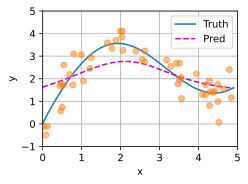

In [6]:
# `X_repeat` 的形状: (`n_test`, `n_train`),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# `x_train` 包含着键。`attention_weights` 的形状：(`n_test`, `n_train`),
# 每一行都包含着要在给定的每个查询的值（`y_train`）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# `y_hat` 的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

现在，让我们来观察注意力的权重。这里测试数据的输入相当于查询，而训练数据的输入相当于键。因为两个输入都是经过排序的，因此由观察可知“查询-键”对越接近，注意力汇聚的[**注意力权重**]就越高。


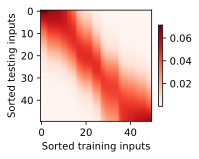

In [7]:
d2l.show_heatmaps(
    attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel='Sorted training inputs', ylabel='Sorted testing inputs')

## [**带参数注意力汇聚**]

非参数的 Nadaraya-Watson 核回归具有 *一致性*（consistency） 的优点：如果有足够的数据，此模型会收敛到最优结果。尽管如此，我们还是可以轻松地将可学习的参数集成到注意力汇聚中。

例如，与 :eqref:`eq_nadaraya-waston-gaussian` 略有不同，在下面的查询 $x$ 和键 $x_i$ 之间的距离乘以可学习参数 $w$：

$$\begin{aligned}f(x) &= \sum_{i=1}^n \alpha(x, x_i) y_i \\&= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}((x - x_i)w)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}((x - x_i)w)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}((x - x_i)w)^2\right) y_i.\end{aligned}$$
:eqlabel:`eq_nadaraya-waston-gaussian-para`

在本节的余下部分，我们将通过训练这个模型 :eqref:`eq_nadaraya-waston-gaussian-para` 来学习注意力汇聚的参数。

### 批量矩阵乘法

:label:`subsec_batch_dot`

为了更有效地计算小批量数据的注意力，我们可以利用深度学习开发框架中提供的批量矩阵乘法。

假设第一个小批量数据包含 $n$ 个矩阵 $\mathbf{X}_1,\ldots, \mathbf{X}_n$，形状为 $a\times b$，第二个小批量包含 $n$ 个矩阵 $\mathbf{Y}_1, \ldots, \mathbf{Y}_n$，形状为 $b\times c$。它们的批量矩阵乘法得到 $n$ 个矩阵 $\mathbf{X}_1\mathbf{Y}_1, \ldots, \mathbf{X}_n\mathbf{Y}_n$，形状为 $a\times c$。因此，[**假定两个张量的形状分别是 $(n,a,b)$ 和 $(n,b,c)$ ，它们的批量矩阵乘法输出的形状为 $(n,a,c)$**]。


In [4]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

torch.Size([2, 1, 6])

在注意力机制的背景中，我们可以[**使用小批量矩阵乘法来计算小批量数据中的加权平均值**]。


In [5]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

tensor([[[ 4.5000]],

        [[14.5000]]])

In [6]:
weights.unsqueeze(1).shape

torch.Size([2, 1, 10])

In [8]:
values.unsqueeze(-1).shape

torch.Size([2, 10, 1])

### 定义模型

基于 :eqref:`eq_nadaraya-waston-gaussian-para` 中的[**带参数的注意力汇聚**]，使用小批量矩阵乘法，定义 Nadaraya-Watson 核回归的带参数版本为：


In [10]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))

    def forward(self, queries, keys, values):
        # `queries` 和 `attention_weights` 的形状为 (查询个数, “键－值”对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape(
            (-1, keys.shape[1]))
        self.attention_weights = nn.functional.softmax(
            -((queries - keys) * self.w)**2 / 2, dim=1)
        # `values` 的形状为 (查询个数, “键－值”对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1),
                         values.unsqueeze(-1)).reshape(-1)

### 训练模型

接下来，[**将训练数据集转换为键和值**]用于训练注意力模型。在带参数的注意力汇聚模型中，任何一个训练样本的输入都会和除自己以外的所有训练样本的“键－值”对进行计算，从而得到其对应的预测输出。


In [11]:
# `X_tile` 的形状: (`n_train`, `n_train`), 每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# `Y_tile` 的形状: (`n_train`, `n_train`), 每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# `keys` 的形状: ('n_train', 'n_train' - 1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape(
    (n_train, -1))
# `values` 的形状: ('n_train', 'n_train' - 1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape(
    (n_train, -1))

[**训练带参数的注意力汇聚模型**]时使用平方损失函数和随机梯度下降。


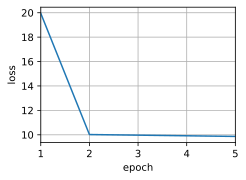

In [12]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    # 注意：L2 Loss = 1/2 * MSE Loss。
    # PyTorch 的 MSE Loss 与 MXNet 的 L2Loss 差一个 2 的因子，因此被除2。
    l = loss(net(x_train, keys, values), y_train) / 2
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

训练完带参数的注意力汇聚模型后，我们发现，在尝试拟合带噪声的训练数据时，[**预测结果绘制**]的线不如之前非参数模型的线平滑。


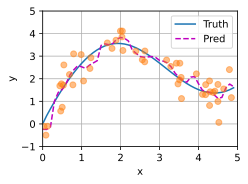

In [13]:
# `keys` 的形状: (`n_test`, `n_train`), 每一行包含着相同的训练输入（例如：相同的键）
keys = x_train.repeat((n_test, 1))
# `value` 的形状: (`n_test`, `n_train`)
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

与非参数的注意力汇聚模型相比，带参数的模型加入可学习的参数后，在输出结果的绘制图上，[**曲线在注意力权重较大的区域变得更不平滑**]。


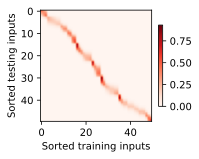

In [14]:
d2l.show_heatmaps(
    net.attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel='Sorted training inputs', ylabel='Sorted testing inputs')

## 小结

* Nadaraya-Watson 核回归是具有注意力机制的机器学习的一个例子。
* Nadaraya-Watson 核回归的注意力汇聚是对训练数据中输出的加权平均。从注意力的角度来看，分配给每个值的注意力权重取决于将值所对应的键和查询作为输入的函数。
* 注意力汇聚可以分为非参数型和带参数型。

## 练习

1. 增加训练数据的样本数量。能否得到更好的非参数的 Nadaraya-Watson 核回归模型？
1. 在带参数的注意力汇聚的实验中学习得到的参数 $w$ 的价值是什么？为什么在可视化注意力权重时，它会使加权区域更加尖锐？
1. 如何将超参数添加到非参数的 Nadaraya-Watson 核回归中以实现更好地预测结果？
1. 为本节的核回归设计一个新的带参数的注意力汇聚模型。训练这个新模型并可视化其注意力权重。


# 注意力打分函数
:label:`sec_attention-scoring-functions`

在 :numref:`sec_nadaraya-waston` 中，我们使用高斯核来对查询和键之间的关系建模。可以将 :eqref:`eq_nadaraya-waston-gaussian` 中的高斯核的指数部分视为 *注意力打分函数*（attention scoring function），简称 *打分函数*（scoring function），然后把这个函数的输出结果输入到 softmax 函数中进行运算。通过上述步骤，我们将得到与键对应的值的概率分布（即注意力权重）。最后，注意力汇聚的输出就是基于这些注意力权重的值的加权和。

从宏观来看，可以使用上述算法来实现 :numref:`fig_qkv` 中的注意力机制框架。:numref:`fig_attention_output` 说明了如何将注意力汇聚的输出计算成为值的加权和，其中 $a$ 表示注意力打分函数。由于注意力权重是概率分布，因此加权和其本质上是加权平均值。

![计算注意力汇聚的输出为值的加权和。](../img/attention-output.svg)
:label:`fig_attention_output`

用数学语言描述，假设有一个查询 $\mathbf{q} \in \mathbb{R}^q$ 和 $m$ 个“键－值”对 $(\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)$，其中 $\mathbf{k}_i \in \mathbb{R}^k$，$\mathbf{v}_i \in \mathbb{R}^v$。注意力汇聚函数 $f$ 就被表示成值的加权和：

$$f(\mathbf{q}, (\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)) = \sum_{i=1}^m \alpha(\mathbf{q}, \mathbf{k}_i) \mathbf{v}_i \in \mathbb{R}^v,$$
:eqlabel:`eq_attn-pooling`

其中查询 $\mathbf{q}$ 和键 $\mathbf{k}_i$ 的注意力权重（标量）是通过注意力打分函数 $a$ 将两个向量映射成标量，再经过 softmax 运算得到的：

$$\alpha(\mathbf{q}, \mathbf{k}_i) = \mathrm{softmax}(a(\mathbf{q}, \mathbf{k}_i)) = \frac{\exp(a(\mathbf{q}, \mathbf{k}_i))}{\sum_{j=1}^m \exp(a(\mathbf{q}, \mathbf{k}_j))} \in \mathbb{R}.$$
:eqlabel:`eq_attn-scoring-alpha`

正如我们所看到的，选择不同的注意力打分函数 $a$ 会导致不同的注意力汇聚操作。在本节中，我们将介绍两个流行的打分函数，稍后将用他们来实现更复杂的注意力机制。


In [1]:
import math
import torch
from torch import nn
from d2l import torch as d2l

## [**遮蔽softmax操作**]

正如上面提到的，softmax 运算用于输出一个概率分布作为注意力权重。在某些情况下，并非所有的值都应该被纳入到注意力汇聚中。例如，为了在 :numref:`sec_machine_translation` 中高效处理小批量数据集，某些文本序列被填充了没有意义的特殊标记。为了仅将有意义的标记作为值去获取注意力汇聚，可以指定一个有效序列长度（即标记的个数），以便在计算 softmax 时过滤掉超出指定范围的位置。通过这种方式，我们可以在下面的 `masked_softmax` 函数中实现这样的 *遮蔽 softmax 操作*（masked softmax operation），其中任何超出有效长度的位置都被遮蔽并置为0。


In [12]:
#@save
def masked_softmax(X, valid_lens):
    """通过在最后一个轴上遮蔽元素来执行 softmax 操作"""
    # `X`: 3D张量, `valid_lens`: 1D或2D 张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 在最后的轴上，被遮蔽的元素使用一个非常大的负值替换，从而其 softmax (指数)输出为 0
        # 从而达到忽略的效果
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens,
                              value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

为了[**演示此函数是如何工作**]的，考虑由两个 $2 \times 4$ 矩阵表示的样本，这两个样本的有效长度分别为 $2$ 和 $3$。经过遮蔽 softmax 操作，超出有效长度的值都被遮蔽为0。


In [3]:
masked_softmax(torch.rand(2, 2, 4), torch.tensor([2, 3]))

tensor([[[0.5089, 0.4911, 0.0000, 0.0000],
         [0.5767, 0.4233, 0.0000, 0.0000]],

        [[0.2270, 0.4099, 0.3630, 0.0000],
         [0.2809, 0.3901, 0.3289, 0.0000]]])

同样，我们也可以使用二维张量为矩阵样本中的每一行指定有效长度。


In [4]:
masked_softmax(torch.rand(2, 2, 4), torch.tensor([[1, 3], [2, 4]]))

tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.2178, 0.4802, 0.3020, 0.0000]],

        [[0.3727, 0.6273, 0.0000, 0.0000],
         [0.2801, 0.2185, 0.2313, 0.2701]]])

## [**加性注意力**]
:label:`subsec_additive-attention`

一般来说，当查询和键是不同长度的矢量时，可以使用加性注意力作为打分函数。给定查询 $\mathbf{q} \in \mathbb{R}^q$ 和键 $\mathbf{k} \in \mathbb{R}^k$，*加性注意力*（additive attention） 的打分函数为

$$a(\mathbf q, \mathbf k) = \mathbf w_v^\top \text{tanh}(\mathbf W_q\mathbf q + \mathbf W_k \mathbf k) \in \mathbb{R},$$
:eqlabel:`eq_additive-attn`

其中可学习的参数是 $\mathbf W_q\in\mathbb R^{h\times q}$、$\mathbf W_k\in\mathbb R^{h\times k}$ 和 $\mathbf w_v\in\mathbb R^{h}$。如 :eqref:`eq_additive-attn` 所示，将查询和键连接起来后输入到一个多层感知机（MLP）中，感知机包含一个隐藏层，其隐藏单元数是一个超参数 $h$。通过使用 $\tanh$ 作为激活函数，并且禁用偏置项，我们将在下面实现加性注意力。


In [27]:
#@save
class AdditiveAttention(nn.Module):
    """加性注意力"""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens):
        queries, keys = self.W_q(queries), self.W_k(keys)
        print(queries.shape,keys.shape,sep="\t")
        # `queries` 的形状：(`batch_size`,查询的个数，一个查询的长度)
        # `key` 的形状：(`batch_size`,“键－值”对的个数，一个键的长度)
        # 使用广播方式进行求和
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        print(queries.unsqueeze(2).shape,keys.unsqueeze(1).shape,sep="\t")
        print(features.shape)
        features = torch.tanh(features)
        print(features.shape)
        # `self.w_v` 仅有一个输出，因此从形状中移除最后那个维度。
        # `scores` 的形状：(`batch_size`, 查询的个数, “键-值”对的个数)
        print(self.w_v(features).shape)
        scores = self.w_v(features).squeeze(-1)
        print(scores.shape)
        print(values.shape)
        self.attention_weights = masked_softmax(scores, valid_lens)
        # `values` 的形状：(`batch_size`, “键－值”对的个数, 值的维度)
        return torch.bmm(self.dropout(self.attention_weights), values)

让我们用一个小例子来[**演示上面的`AdditiveAttention`类**]，其中查询、键和值的形状为（批量大小、步数或标记序列长度、特征大小），实际输出为 $(2,1,20)$、$(2,10,2)$ 和 $(2,10,4)$。注意力汇聚输出的形状为（批量大小、查询的步数、值的维度）。


In [30]:
queries, keys = torch.normal(0, 1, (2, 1, 20)), torch.ones((2, 10, 2))
# `values` 的小批量数据集中，两个值矩阵是相同的
values = torch.arange(40, dtype=torch.float32).reshape(1,10,4).repeat(2, 1, 1)
valid_lens = torch.tensor([2, 6])

attention = AdditiveAttention(key_size=2, query_size=20, num_hiddens=8,
                              dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens).shape

torch.Size([2, 1, 8])	torch.Size([2, 10, 8])
torch.Size([2, 1, 1, 8])	torch.Size([2, 1, 10, 8])
torch.Size([2, 1, 10, 8])
torch.Size([2, 1, 10, 8])
torch.Size([2, 1, 10, 1])
torch.Size([2, 1, 10])
torch.Size([2, 10, 4])


torch.Size([2, 1, 4])

尽管加性注意力包含了可学习的参数，但由于本例子中每个键都是相同的，所以[**注意力权重**]是均匀的，由指定的有效长度决定。


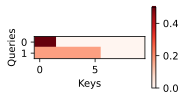

In [7]:
d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)),
                  xlabel='Keys', ylabel='Queries')

## [**缩放点积注意力**]

使用点积可以得到计算效率更高的打分函数。但是点积操作要求查询和键具有相同的长度 $d$。假设查询和键的所有元素都是独立的随机变量，并且都满足均值为 $0$ 和方差为 $1$。那么两个向量的点积的均值为 $0$，方差为 $d$。为确保无论向量长度如何，点积的方差在不考虑向量长度的情况下仍然是 $1$，则可以使用 *缩放点积注意力*（scaled dot-product attention） 打分函数：

$$a(\mathbf q, \mathbf k) = \mathbf{q}^\top \mathbf{k}  /\sqrt{d}$$

将点积除以 $\sqrt{d}$。在实践中，我们通常从小批量的角度来考虑提高效率，例如基于 $n$ 个查询和 $m$ 个键－值对计算注意力，其中查询和键的长度为 $d$，值的长度为 $v$。查询 $\mathbf Q\in\mathbb R^{n\times d}$、键 $\mathbf K\in\mathbb R^{m\times d}$ 和值 $\mathbf V\in\mathbb R^{m\times v}$ 的缩放点积注意力是

$$ \mathrm{softmax}\left(\frac{\mathbf Q \mathbf K^\top }{\sqrt{d}}\right) \mathbf V \in \mathbb{R}^{n\times v}.$$
:eqlabel:`eq_softmax_QK_V`

在下面的缩放点积注意力的实现中，我们使用了 dropout 进行模型正则化。


In [8]:
#@save
class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # `queries` 的形状：(`batch_size`, 查询的个数, `d`)
    # `keys` 的形状：(`batch_size`, “键－值”对的个数, `d`)
    # `values` 的形状：(`batch_size`, “键－值”对的个数, 值的维度)
    # `valid_lens` 的形状: (`batch_size`,) 或者 (`batch_size`, 查询的个数)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # 设置 `transpose_b=True` 为了交换 `keys` 的最后两个维度
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)

为了[**演示上述的`DotProductAttention`类**]，我们使用了与先前加性注意力例子中相同的键、值和有效长度。对于点积操作，令查询的特征维度与键的特征维度大小相同。


In [9]:
queries = torch.normal(0, 1, (2, 1, 2))
attention = DotProductAttention(dropout=0.5)
attention.eval()
attention(queries, keys, values, valid_lens)

tensor([[[ 2.0000,  3.0000,  4.0000,  5.0000]],

        [[10.0000, 11.0000, 12.0000, 13.0000]]])

与加性注意力演示相同，由于键包含的是相同的元素，而这些元素无法通过任何查询进行区分，因此获得了[**均匀的注意力权重**]。


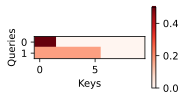

In [10]:
d2l.show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)),
                  xlabel='Keys', ylabel='Queries')

## 小结

* 可以将注意力汇聚的输出计算作为值的加权平均，选择不同的注意力评分函数会带来不同的注意力汇聚操作。
* 当查询和键是不同长度的矢量时，可以使用可加性注意力评分函数。当它们的长度相同时，使用缩放的“点－积”注意力评分函数的计算效率更高。

## 练习

1. 修改小例子中的键，并且可视化注意力权重。可加性注意力和缩放的“点－积”注意力是否仍然产生相同的结果？为什么？
1. 只使用矩阵乘法，您能否为具有不同矢量长度的查询和键设计新的评分函数？
1. 当查询和键具有相同的矢量长度时，矢量求和作为评分函数是否比“点－积”更好？为什么？


# Bahdanau 注意力
:label:`sec_seq2seq_attention`

我们在 :numref:`sec_seq2seq` 中探讨了机器翻译问题，在那里我们设计了一个基于两个循环神经网络的编码器-解码器结构，用于序列到序列的学习。具体来说，循环神经网络编码器将可变长度序列转换为固定形状的上下文变量，然后循环神经网络解码器根据生成的标记和上下文变量按标记生成输出（目标）序列标记。但是，即使并非所有输入（源）标记都对解码某个标记都有用，但在每个解码步骤中仍使用编码整个输入序列的*相同*上下文变量。

在为给定文本序列生成手写的挑战中，格雷夫斯设计了一种可微注意力模型，将文本字符与更长的笔迹对齐，其中对齐方式仅向一个方向移动 :cite:`Graves.2013`。受学习对齐想法的启发，Bahdanau 等人提出了一个没有严格的单向对齐限制 :cite:`Bahdanau.Cho.Bengio.2014` 的可微注意力模型。在预测标记时，如果不是所有输入标记都相关，模型将仅对齐（或参与）输入序列中与当前预测相关的部分。这是通过将上下文变量视为注意力集中的输出来实现的。

## 模型

在下面描述 Bahdanau 注意力对循环神经网络编码器的关注时，我们将遵循 :numref:`sec_seq2seq` 中的相同符号表达。新的基于注意力的模型与 :numref:`sec_seq2seq` 中的模型相同，只不过 :eqref:`eq_seq2seq_s_t` 中的上下文变量 $\mathbf{c}$ 在任何解码时间步骤 $t'$ 都会被 $\mathbf{c}_{t'}$ 替换。假设输入序列中有 $T$ 个标记，解码时间步长 $t'$ 的上下文变量是注意力集中的输出：

$$\mathbf{c}_{t'} = \sum_{t=1}^T \alpha(\mathbf{s}_{t' - 1}, \mathbf{h}_t) \mathbf{h}_t,$$

其中，时间步 $t' - 1$ 时的解码器隐藏状态 $\mathbf{s}_{t' - 1}$ 是查询，编码器隐藏状态 $\mathbf{h}_t$ 既是键，也是值，注意力权重 $\alpha$ 是使用 :eqref:`eq_attn-scoring-alpha` 所定义的加性注意力打分函数计算的。

与 :numref:`fig_seq2seq_details` 中的循环神经网络编码器-解码器结构略有不同， :numref:`fig_s2s_attention_details` 描述了 Bahdanau 注意力的结构。

![在一个带有Bahdanau注意力的循环神经网络编码器-解码器模型中的层。](../img/seq2seq-attention-details.svg)
:label:`fig_s2s_attention_details`


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 定义注意力解码器

要用 Bahdanau 注意力实现循环神经网络编码器-解码器，我们只需重新定义解码器即可。为了更方便地显示学习的注意力权重，以下 `AttentionDecoder` 类定义了[**带有注意力机制的解码器基本接口**]。


In [2]:
#@save
class AttentionDecoder(d2l.Decoder):
    """带有注意力机制的解码器基本接口"""
    def __init__(self, **kwargs):
        super(AttentionDecoder, self).__init__(**kwargs)

    @property
    def attention_weights(self):
        raise NotImplementedError

接下来，让我们在接下来的 `Seq2SeqAttentionDecoder` 类中[**实现带有Bahdanau注意力的循环神经网络解码器**]。初始化解码器的状态 （1）编码器在所有时间步的最终层隐藏状态（作为注意力的键和值）；（2）最后一个时间步的编码器全层隐藏状态（初始化解码器的隐藏状态）；（3）编码器有效长度（排除在注意力池中填充标记）。在每个解码时间步骤中，解码器上一个时间步的最终层隐藏状态将用作关注的查询。因此，注意力输出和输入嵌入都连接为循环神经网络解码器的输入。


In [3]:
class Seq2SeqAttentionDecoder(AttentionDecoder):
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                 dropout=0, **kwargs):
        super(Seq2SeqAttentionDecoder, self).__init__(**kwargs)
        self.attention = d2l.AdditiveAttention(num_hiddens, num_hiddens,
                                               num_hiddens, dropout)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers,
                          dropout=dropout)
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        # `enc_outputs`的形状为 (`batch_size`, `num_steps`, `num_hiddens`).
        # `hidden_state[0]`的形状为 (`num_layers`, `batch_size`,
        # `num_hiddens`)
        outputs, hidden_state = enc_outputs
        return (outputs.permute(1, 0, 2), hidden_state, enc_valid_lens)

    def forward(self, X, state):
        # `enc_outputs`的形状为 (`batch_size`, `num_steps`, `num_hiddens`).
        # `hidden_state[0]`的形状为 (`num_layers`, `batch_size`,
        # `num_hiddens`)
        enc_outputs, hidden_state, enc_valid_lens = state
        # 输出 `X`的形状为 (`num_steps`, `batch_size`, `embed_size`)
        X = self.embedding(X).permute(1, 0, 2)
        outputs, self._attention_weights = [], []
        for x in X:
            # `query`的形状为 (`batch_size`, 1, `num_hiddens`)
            query = torch.unsqueeze(hidden_state[-1], dim=1)
            # `context`的形状为 (`batch_size`, 1, `num_hiddens`)
            context = self.attention(query, enc_outputs, enc_outputs,
                                     enc_valid_lens)
            # 在特征维度上连结
            x = torch.cat((context, torch.unsqueeze(x, dim=1)), dim=-1)
            # 将 `x` 变形为 (1, `batch_size`, `embed_size` + `num_hiddens`)
            out, hidden_state = self.rnn(x.permute(1, 0, 2), hidden_state)
            outputs.append(out)
            self._attention_weights.append(self.attention.attention_weights)
        # 全连接层变换后， `outputs`的形状为
        # (`num_steps`, `batch_size`, `vocab_size`)
        outputs = self.dense(torch.cat(outputs, dim=0))
        return outputs.permute(1, 0, 2), [
            enc_outputs, hidden_state, enc_valid_lens]

    @property
    def attention_weights(self):
        return self._attention_weights

接下来，我们使用包含 7 个时间步的 4 个序列输入的小批量[**测试Bahdanau 注意力解码器**]。


In [4]:
encoder = d2l.Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16,
                             num_layers=2)
encoder.eval()
decoder = Seq2SeqAttentionDecoder(vocab_size=10, embed_size=8, num_hiddens=16,
                                  num_layers=2)
decoder.eval()
X = torch.zeros((4, 7), dtype=torch.long)  # (`batch_size`, `num_steps`)
state = decoder.init_state(encoder(X), None)
output, state = decoder(X, state)
output.shape, len(state), state[0].shape, len(state[1]), state[1][0].shape

(torch.Size([4, 7, 10]), 3, torch.Size([4, 7, 16]), 2, torch.Size([4, 16]))

## [**训练**]

与 :numref:`sec_seq2seq_training` 类似，我们在这里指定超参数，实例化一个带有 Bahdanau 注意力的编码器和解码器，并对这个模型进行机器翻译训练。由于新增的注意力机制，这项训练要比没有注意力机制的 :numref:`sec_seq2seq_training` 慢得多。


loss 0.021, 4793.5 tokens/sec on cuda:0


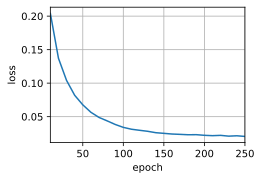

In [5]:
embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 250, d2l.try_gpu()

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)
encoder = d2l.Seq2SeqEncoder(len(src_vocab), embed_size, num_hiddens,
                             num_layers, dropout)
decoder = Seq2SeqAttentionDecoder(len(tgt_vocab), embed_size, num_hiddens,
                                  num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

模型训练后，我们用它[**将几个英语句子翻译成法语**]并计算它们的 BLEU 分数。


In [6]:
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(
        net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    print(f'{eng} => {translation}, ',
          f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va !,  bleu 1.000
i lost . => j'ai perdu .,  bleu 1.000
he's calm . => il est mouillé .,  bleu 0.658
i'm home . => je suis chez moi .,  bleu 1.000


In [7]:
attention_weights = torch.cat(
    [step[0][0][0] for step in dec_attention_weight_seq], 0).reshape(
        (1, 1, -1, num_steps))

训练结束后通过[**可视化注意力权重**]，我们可以看到，每个查询都会在键值对上分配不同的权重。它显示，在每个解码步中，输入序列的不同部分被选择性地聚集在注意力池中。


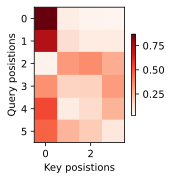

In [8]:
# 加上一个包含序列结束标记
d2l.show_heatmaps(
    attention_weights[:, :, :, :len(engs[-1].split()) + 1].cpu(),
    xlabel='Key posistions', ylabel='Query posistions')

# 多头注意力
:label:`sec_multihead-attention`

在实践中，当给定相同的查询、键和值的集合时，我们希望模型可以基于相同的注意力机制学习到不同的行为，然后将不同的行为作为知识组合起来，例如捕获序列内各种范围的依赖关系（例如，短距离依赖和长距离依赖）。因此，允许注意力机制组合使用查询、键和值的不同 *子空间表示*（representation subspaces）可能是有益的。

为此，与使用单独一个注意力汇聚不同，我们可以用独立学习得到的 $h$ 组不同的 *线性投影*（linear projections）来变换查询、键和值。然后，这 $h$ 组变换后的查询、键和值将并行地送到注意力汇聚中。最后，将这 $h$ 个注意力汇聚的输出拼接在一起，并且通过另一个可以学习的线性投影进行变换，以产生最终输出。这种设计被称为 *多头注意力*，其中 $h$ 个注意力汇聚输出中的每一个输出都被称作一个 *头*（head） :cite:`Vaswani.Shazeer.Parmar.ea.2017`。 :numref:`fig_multi-head-attention` 展示了使用全连接层来实现可学习的线性变换的多头注意力。

![多头注意力，多个头连结然后线性变换。](../img/multi-head-attention.svg)
:label:`fig_multi-head-attention`

## 模型

在实现多头注意力之前，让我们用数学语言将这个模型形式化地描述出来。给定查询 $\mathbf{q} \in \mathbb{R}^{d_q}$、键 $\mathbf{k} \in \mathbb{R}^{d_k}$ 和值 $\mathbf{v} \in \mathbb{R}^{d_v}$，每个注意力头 $\mathbf{h}_i$ ($i = 1, \ldots, h$) 的计算方法为：

$$\mathbf{h}_i = f(\mathbf W_i^{(q)}\mathbf q, \mathbf W_i^{(k)}\mathbf k,\mathbf W_i^{(v)}\mathbf v) \in \mathbb R^{p_v},$$

其中，可学习的参数包括 $\mathbf W_i^{(q)}\in\mathbb R^{p_q\times d_q}$、$\mathbf W_i^{(k)}\in\mathbb R^{p_k\times d_k}$ 和 $\mathbf W_i^{(v)}\in\mathbb R^{p_v\times d_v}$ ，以及代表注意力汇聚的函数 $f$ 。$f$ 可以是 :numref:`sec_attention-scoring-functions` 中的加性注意力和缩放点积注意力。多头注意力的输出需要经过另一个线性转换，它对应着 $h$ 个头连结后的结果，因此其可学习参数是 $\mathbf W_o\in\mathbb R^{p_o\times h p_v}$：

$$\mathbf W_o \begin{bmatrix}\mathbf h_1\\\vdots\\\mathbf h_h\end{bmatrix} \in \mathbb{R}^{p_o}.$$

基于这种设计，每个头都可能会关注输入的不同部分。可以表示比简单加权平均值更复杂的函数。


In [1]:
import math
import torch
from torch import nn
from d2l import torch as d2l

## 实现

在实现过程中，我们[**选择缩放点积注意力作为每一个注意力头**]。为了避免计算成本和参数数量的大幅增长，我们设定 $p_q = p_k = p_v = p_o / h$。值得注意的是，如果我们将查询、键和值的线性变换的输出数量设置为 $p_q h = p_k h = p_v h = p_o$，则可以并行计算 $h$ 个头。在下面的实现中，$p_o$ 是通过参数 `num_hiddens` 指定的。


In [2]:
#@save
class MultiHeadAttention(nn.Module):
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 num_heads, dropout, bias=False, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.attention = d2l.DotProductAttention(dropout)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=bias)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=bias)
        self.W_v = nn.Linear(value_size, num_hiddens, bias=bias)
        self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=bias)

    def forward(self, queries, keys, values, valid_lens):
        # `queries`, `keys`, or `values` 的形状:
        # (`batch_size`, 查询或者“键－值”对的个数, `num_hiddens`)
        # `valid_lens`　的形状:
        # (`batch_size`,) or (`batch_size`, 查询的个数)
        # 经过变换后，输出的 `queries`, `keys`, or `values`　的形状:
        # (`batch_size` * `num_heads`, 查询或者“键－值”对的个数,
        # `num_hiddens` / `num_heads`)
        queries = transpose_qkv(self.W_q(queries), self.num_heads)
        keys = transpose_qkv(self.W_k(keys), self.num_heads)
        values = transpose_qkv(self.W_v(values), self.num_heads)

        if valid_lens is not None:
            # 在轴 0，将第一项（标量或者矢量）复制 `num_heads` 次，
            # 然后如此复制第二项，然后诸如此类。
            valid_lens = torch.repeat_interleave(valid_lens,
                                                 repeats=self.num_heads,
                                                 dim=0)

        # `output` 的形状: (`batch_size` * `num_heads`, 查询的个数,
        # `num_hiddens` / `num_heads`)
        output = self.attention(queries, keys, values, valid_lens)

        # `output_concat` 的形状: (`batch_size`, 查询的个数, `num_hiddens`)
        output_concat = transpose_output(output, self.num_heads)
        return self.W_o(output_concat)

为了能够[**使多个头并行计算**]，上面的 `MultiHeadAttention` 类使用了下面定义的两个转置函数。具体来说，`transpose_output` 函数反转了 `transpose_qkv` 函数的操作。


In [3]:
#@save
def transpose_qkv(X, num_heads):
    # 输入 `X` 的形状: (`batch_size`, 查询或者“键－值”对的个数, `num_hiddens`).
    # 输出 `X` 的形状: (`batch_size`, 查询或者“键－值”对的个数, `num_heads`,
    # `num_hiddens` / `num_heads`)
    X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

    # 输出 `X` 的形状: (`batch_size`, `num_heads`, 查询或者“键－值”对的个数,
    # `num_hiddens` / `num_heads`)
    X = X.permute(0, 2, 1, 3)

    # `output` 的形状: (`batch_size` * `num_heads`, 查询或者“键－值”对的个数,
    # `num_hiddens` / `num_heads`)
    return X.reshape(-1, X.shape[2], X.shape[3])

#@save
def transpose_output(X, num_heads):
    """逆转 `transpose_qkv` 函数的操作"""
    X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])
    X = X.permute(0, 2, 1, 3)
    return X.reshape(X.shape[0], X.shape[1], -1)

让我们使用键和值相同的小例子来[**测试**]我们编写的 `MultiHeadAttention` 类。多头注意力输出的形状是 (`batch_size`, `num_queries`, `num_hiddens`)。


In [4]:
num_hiddens, num_heads = 100, 5
attention = MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens,
                               num_hiddens, num_heads, 0.5)
attention.eval()

MultiHeadAttention(
  (attention): DotProductAttention(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (W_q): Linear(in_features=100, out_features=100, bias=False)
  (W_k): Linear(in_features=100, out_features=100, bias=False)
  (W_v): Linear(in_features=100, out_features=100, bias=False)
  (W_o): Linear(in_features=100, out_features=100, bias=False)
)

In [5]:
batch_size, num_queries, num_kvpairs, valid_lens = 2, 4, 6, torch.tensor([
    3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
Y = torch.ones((batch_size, num_kvpairs, num_hiddens))
attention(X, Y, Y, valid_lens).shape

torch.Size([2, 4, 100])

## 小结

* 在预测标记时，如果不是所有输入标记都是相关的，那么具有 Bahdanau 注意力的循环神经网络编码器-解码器会有选择地统计输入序列的不同部分。这是通过将上下文变量视为加性注意力池化的输出来实现的。
* 在循环神经网络编码器-解码器中，Bahdanau 注意力将上一个时间步的解码器隐藏状态视为查询，在所有时间步的编码器隐藏状态同时视为键和值。

## 练习

1. 在实验中用 LSTM 替换 GRU。
1. 修改实验以将加性注意力打分函数替换为缩放点积注意力。它如何影响训练效率？


# 自注意力和位置编码
:label:`sec_self-attention-and-positional-encoding`

在深度学习中，我们经常使用卷积神经网络（CNN）或循环神经网络（RNN）对序列进行编码。现在想象一下，有了注意力机制之后，我们将标记序列输入注意力池化中，以便同一组标记同时充当查询、键和值。具体来说，每个查询都会关注所有的键－值对并生成一个注意力输出。由于查询、键和值来自同一组输入，因此被称为
*自注意力*（self-attention:cite:`Lin.Feng.Santos.ea.2017,Vaswani.Shazeer.Parmar.ea.2017` ，也被称为 *内部注意力*（intra-attention） :cite:`Cheng.Dong.Lapata.2016,Parikh.Tackstrom.Das.ea.2016,Paulus.Xiong.Socher.2017`。在本节中，我们将讨论使用自注意力进行序列编码，包括使用序列的顺序作为补充信息。


In [1]:
import math
import torch
from torch import nn
from d2l import torch as d2l

## [**自注意力**]

给定一个由标记组成的输入序列 $\mathbf{x}_1, \ldots, \mathbf{x}_n$，其中任意 $\mathbf{x}_i \in \mathbb{R}^d$ ($1 \leq i \leq n$)。该序列的自注意力输出为一个长度相同的序列 $\mathbf{y}_1, \ldots, \mathbf{y}_n$，其中：

$$\mathbf{y}_i = f(\mathbf{x}_i, (\mathbf{x}_1, \mathbf{x}_1), \ldots, (\mathbf{x}_n, \mathbf{x}_n)) \in \mathbb{R}^d$$

根据 :eqref:`eq_attn-pooling` 中定义的注意力池化函数 $f$。下面的代码片段是基于多头注意力对一个张量完成自注意力的计算，张量的形状为 (批量大小, 时间步的数目或标记序列的长度, $d$) 。输出与输入的张量形状相同。


In [2]:
num_hiddens, num_heads = 100, 5
attention = d2l.MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens,
                                   num_hiddens, num_heads, 0.5)
attention.eval()

MultiHeadAttention(
  (attention): DotProductAttention(
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (W_q): Linear(in_features=100, out_features=100, bias=False)
  (W_k): Linear(in_features=100, out_features=100, bias=False)
  (W_v): Linear(in_features=100, out_features=100, bias=False)
  (W_o): Linear(in_features=100, out_features=100, bias=False)
)

In [3]:
batch_size, num_queries, valid_lens = 2, 4, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
attention(X, X, X, valid_lens).shape

torch.Size([2, 4, 100])

## 比较卷积神经网络、循环神经网络和自注意力
:label:`subsec_cnn-rnn-self-attention`

让我们比较下面几个架构，目标都是将由 $n$ 个标记组成的序列映射到另一个长度相等的序列，其中的每个输入标记或输出标记都由 $d$ 维向量表示。具体来说，我们将比较的是卷积神经网络、循环神经网络和自注意力这几个架构的计算复杂性、顺序操作和最大路径长度。请注意，顺序操作会妨碍并行计算，而任意的序列位置组合之间的路径越短，则能更轻松地学习序列中的远距离依赖关系 :cite:`Hochreiter.Bengio.Frasconi.ea.2001` 。

![比较卷积神经网络（填充标记被忽略）、循环神经网络和自注意力三种架构。](../img/cnn-rnn-self-attention.svg)
:label:`fig_cnn-rnn-self-attention`

考虑一个卷积核大小为 $k$ 的卷积层。我们将在后面的章节中提供关于使用卷积神经网络处理序列的更多详细信息。目前，我们只需要知道，由于序列长度是 $n$，输入和输出的通道数量都是 $d$，所以卷积层的计算复杂度为 $\mathcal{O}(knd^2)$。如 :numref:`fig_cnn-rnn-self-attention` 所示，卷积神经网络是分层的，因此为有 $\mathcal{O}(1)$ 个顺序操作，最大路径长度为 $\mathcal{O}(n/k)$。例如，$\mathbf{x}_1$ 和 $\mathbf{x}_5$ 处于 :numref:`fig_cnn-rnn-self-attention` 中卷积核大小为 3 的双层卷积神经网络的感受野内。

当更新循环神经网络的隐藏状态时，$d \times d$ 权重矩阵和 $d$ 维隐藏状态的乘法计算复杂度为 $\mathcal{O}(d^2)$。由于序列长度为 $n$，因此循环神经网络层的计算复杂度为 $\mathcal{O}(nd^2)$。根据 :numref:`fig_cnn-rnn-self-attention`，有 $\mathcal{O}(n)$ 个顺序操作无法并行化，最大路径长度也是 $\mathcal{O}(n)$。

在自注意力中，查询、键和值都是 $n \times d$ 矩阵。考虑 :eqref:`eq_softmax_QK_V` 中缩放的”点－积“注意力，其中 $n \times d$ 矩阵乘以 $d \times n$ 矩阵，然后输出的 $n \times n$ 矩阵乘以 $n \times d$ 矩阵。因此，自注意力具有 $\mathcal{O}(n^2d)$ 计算复杂性。正如我们在 :numref:`fig_cnn-rnn-self-attention` 中看到的那样，每个标记都通过自注意力直接连接到任何其他标记。因此，有 $\mathcal{O}(1)$ 个顺序操作可以并行计算，最大路径长度也是 $\mathcal{O}(1)$。

总而言之，卷积神经网络和自注意力都拥有并行计算的优势，而且自注意力的最大路径长度最短。但是因为其计算复杂度是关于序列长度的二次方，所以在很长的序列中计算会非常慢。

## [**位置编码**]
:label:`subsec_positional-encoding`

在处理标记序列时，循环神经网络是逐个的重复地处理标记的，而自注意力则因为并行计算而放弃了顺序操作。为了使用序列的顺序信息，我们通过在输入表示中添加 *位置编码*（positional encoding）来注入绝对的或相对的位置信息。位置编码可以通过学习得到也可以直接固定得到。接下来，我们描述的是基于正弦函数和余弦函数的固定位置编码 :cite:`Vaswani.Shazeer.Parmar.ea.2017` 。

假设输入表示 $\mathbf{X} \in \mathbb{R}^{n \times d}$ 包含一个序列中 $n$ 个标记的 $d$ 维嵌入表示。位置编码使用相同形状的位置嵌入矩阵 $\mathbf{P} \in \mathbb{R}^{n \times d}$ 输出 $\mathbf{X} + \mathbf{P}$，矩阵第 $i$ 行、第$2j$列和$2j$ 列上的元素为：

$$\begin{aligned} p_{i, 2j} &= \sin\left(\frac{i}{10000^{2j/d}}\right),\\p_{i, 2j+1} &= \cos\left(\frac{i}{10000^{2j/d}}\right).\end{aligned}$$
:eqlabel:`eq_positional-encoding-def`

乍一看，这种基于三角函数的设计看起来很奇怪。在解释这个设计之前，让我们先在下面的 `PositionalEncoding` 类中实现它。


In [4]:
#@save
class PositionalEncoding(nn.Module):
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的 `P`
        self.P = torch.zeros((1, max_len, num_hiddens))
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(
                10000,
                torch.arange(0, num_hiddens, 2, dtype=torch.float32) /
                num_hiddens)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

在位置嵌入矩阵 $\mathbf{P}$ 中，[**行代表标记在序列中的位置，列代表位置编码的不同维度**]。在下面的例子中，我们可以看到位置嵌入矩阵的 第$6$列 和 第$7$列的频率高于 第$8$ 列和 第$9$ 列。第$6$列 和 第$7$列之间的偏移量（第$8$ 列和 第$9$ 列相同）是由于正弦函数和余弦函数的交替。


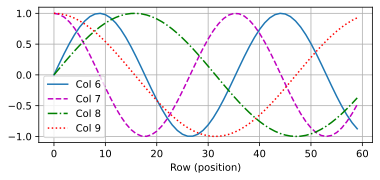

In [5]:
encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
pos_encoding.eval()
X = pos_encoding(torch.zeros((1, num_steps, encoding_dim)))
P = pos_encoding.P[:, :X.shape[1], :]
d2l.plot(torch.arange(num_steps), P[0, :, 6:10].T, xlabel='Row (position)',
         figsize=(6, 2.5), legend=["Col %d" % d for d in torch.arange(6, 10)])

### 绝对位置信息

为了明白沿着编码维度单调降低的频率与绝对位置信息的关系，让我们打印出 $0, 1, \ldots, 7$ 的[**二进制表示**]形式。正如我们所看到的，每个数字、每两个数字和每四个数字上的比特值在第一个最低位、第二个最低位和第三个最低位上分别交替。


In [6]:
for i in range(8):
    print(f'{i} in binary is {i:>03b}')

0 in binary is 000
1 in binary is 001
2 in binary is 010
3 in binary is 011
4 in binary is 100
5 in binary is 101
6 in binary is 110
7 in binary is 111


在二进制表示中，较高比特位的交替频率低于较低比特位，与下面的热图所示相似，只是位置编码通过使用三角函数[**在编码维度上降低频率**]。由于输出是浮点数，因此此类连续表示比二进制表示法更节省空间。


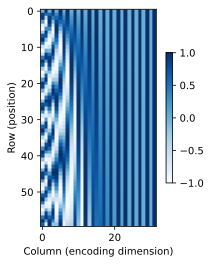

In [7]:
P = P[0, :, :].unsqueeze(0).unsqueeze(0)
d2l.show_heatmaps(P, xlabel='Column (encoding dimension)',
                  ylabel='Row (position)', figsize=(3.5, 4), cmap='Blues')

### 相对位置信息

除了捕获绝对位置信息之外，上述的位置编码还允许模型学习得到输入序列中相对位置信息。这是因为对于任何确定的位置偏移 $\delta$，位置 $i + \delta$ 处的位置编码可以线性投影位置 $i$ 处的位置编码来表示。

这种投影的数学解释是，令 $\omega_j = 1/10000^{2j/d}$，对于任何确定的位置偏移 $\delta$，:eqref:`eq_positional-encoding-def` 中的任何一对 $(p_{i, 2j}, p_{i, 2j+1})$ 都可以线性投影到 $(p_{i+\delta, 2j}, p_{i+\delta, 2j+1})$：

$$\begin{aligned}
&\begin{bmatrix} \cos(\delta \omega_j) & \sin(\delta \omega_j) \\  -\sin(\delta \omega_j) & \cos(\delta \omega_j) \\ \end{bmatrix}
\begin{bmatrix} p_{i, 2j} \\  p_{i, 2j+1} \\ \end{bmatrix}\\
=&\begin{bmatrix} \cos(\delta \omega_j) \sin(i \omega_j) + \sin(\delta \omega_j) \cos(i \omega_j) \\  -\sin(\delta \omega_j) \sin(i \omega_j) + \cos(\delta \omega_j) \cos(i \omega_j) \\ \end{bmatrix}\\
=&\begin{bmatrix} \sin\left((i+\delta) \omega_j\right) \\  \cos\left((i+\delta) \omega_j\right) \\ \end{bmatrix}\\
=& 
\begin{bmatrix} p_{i+\delta, 2j} \\  p_{i+\delta, 2j+1} \\ \end{bmatrix},
\end{aligned}$$

$2\times 2$ 投影矩阵不依赖于任何位置的索引 $i$。

## 小结

* 在自注意力中，查询、键和值都来自同一组输入。
* 卷积神经网络和自注意力都拥有并行计算的优势，而且自注意力的最大路径长度最短。但是因为其计算复杂度是关于序列长度的二次方，所以在很长的序列中计算会非常慢。
* 为了使用序列的顺序信息，我们可以通过在输入表示中添加位置编码来注入绝对的或相对的位置信息。

## 练习

1. 假设我们设计一个深度架构，通过堆叠基于位置编码的自注意力层来表示序列。可能会存在什么问题？
1. 你能设计一种可学习的位置编码方法吗？


# Transformer
:label:`sec_transformer`

我们在 :numref:`subsec_cnn-rnn-self-attention` 中比较了卷积神经网络（CNN）、循环神经网络（RNN）和自注意力（self-attention）。值得注意的是，自注意力同时具有并行计算和最短的最大路径长度这两个优势。因此，使用自注意力来设计深度结构是很有吸引力的。对比之前仍然依赖循环神经网络实现输入表示的自注意力模型  :cite:`Cheng.Dong.Lapata.2016,Lin.Feng.Santos.ea.2017,Paulus.Xiong.Socher.2017` ，Transformer 模型完全基于注意力机制，没有任何卷积层或循环神经网络层 :cite:`Vaswani.Shazeer.Parmar.ea.2017` 。尽管 Transformer 最初是应用于序列到序列的学习文本数据，但现在已经推广到各种现代的深度学习中，例如语言、视觉、语音和强化学习领域。

## 模型

Transformer 作为编码器－解码器结构的一个实例，其整体结构图在 :numref:`fig_transformer` 中展示。正如所见到的，Transformer 是由编码器和解码器组成的。与 :numref:`fig_s2s_attention_details` 中基于 Bahdanau 注意力实现的序列到序列的学习相比，Transformer 的编码器和解码器是基于自注意力的模块叠加而成的，源（输入）序列和目标（输出）序列的 *嵌入*（embedding）表示将加上 *位置编码*（positional encoding），再分别输入到编码器和解码器中。

![Transformer 结构](../img/transformer.svg)
:width:`500px`
:label:`fig_transformer`

图 :numref:`fig_transformer` 中概述了 Transformer 的结构。从宏观角度来看，Transformer 的编码器是由多个相同的层叠加而成的，每个层都有两个子层（子层表示为 $\mathrm{sublayer}$）。第一个子层是 *多头自注意力*（multi-head self-attention）汇聚；第二个子层是 *基于位置的前馈网络*（positionwise feed-forward network）。具体来说，在计算编码器的自注意力时，查询、键和值都来自前一个编码器层的输出。受 :numref:`sec_resnet` 中 ResNet 的启发，每个子层都采用了 *残差连接*（residual connection）。在 Transformer 中，对于序列中任何位置的任何输入 $\mathbf{x} \in \mathbb{R}^d$，都要求满足 $\mathrm{sublayer}(\mathbf{x}) \in \mathbb{R}^d$，以便残差连接满足 $\mathbf{x} + \mathrm{sublayer}(\mathbf{x}) \in \mathbb{R}^d$ 。在残差连接的加法计算之后，紧接着应用 *层归一化*（layer normalization） :cite:`Ba.Kiros.Hinton.2016`。因此，输入序列对应的每个位置，Transformer 编码器都将输出一个 $d$ 维表示向量。

Transformer 解码器也是由多个相同的层叠加而成的，并且层中使用了残差连接和层归一化。除了编码器中描述的两个子层之外，解码器还在这两个子层之间插入了第三个子层，称为 *编码器－解码器注意力*（encoder-decoder attention）层。在编码器－解码器注意力中，查询来自前一个解码器层的输出，而键和值来自整个编码器的输出。在解码器自注意力中，查询、键和值都来自上一个解码器层的输出。但是，解码器中的每个位置只能考虑该位置之前的所有位置。这种 *遮蔽*（masked） 注意力保留了 *自回归*（auto-regressive）属性，确保预测仅依赖于已生成的输出标记。

我们已经描述并实现了基于缩放点积多头注意力 :numref:`sec_multihead-attention` 和位置编码 :numref:`subsec_positional-encoding` 。接下来，我们将实现 Transformer 模型的剩余部分。


In [1]:
import math
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

## [**基于位置的前馈网络**]

基于位置的前馈网络对序列中的所有位置的表示进行变换时使用的是同一个多层感知机（MLP），这就是称前馈网络是 *基于位置的*（positionwise）的原因。在下面的实现中，输入 `X` 的形状（批量大小、时间步数或序列长度、隐单元数或特征维度）将被一个两层的感知机转换成形状为（批量大小、时间步数、`ffn_num_outputs`）的输出张量。


In [2]:
#@save
class PositionWiseFFN(nn.Module):
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs,
                 **kwargs):
        super(PositionWiseFFN, self).__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)

    def forward(self, X):
        return self.dense2(self.relu(self.dense1(X)))

下面的例子显示，[**改变张量的最里层维度的尺寸**]，会改变成基于位置的前馈网络的输出尺寸。因为用同一个多层感知机对所有位置上的输入进行变换，所以当所有这些位置的输入相同时，它们的输出也是相同的。


In [3]:
ffn = PositionWiseFFN(4, 4, 8)
ffn.eval()
ffn(torch.ones((2, 3, 4)))[0]

tensor([[-0.2075, -0.5694, -0.4765,  0.6563,  0.1155, -0.1294, -0.2060, -0.3361],
        [-0.2075, -0.5694, -0.4765,  0.6563,  0.1155, -0.1294, -0.2060, -0.3361],
        [-0.2075, -0.5694, -0.4765,  0.6563,  0.1155, -0.1294, -0.2060, -0.3361]],
       grad_fn=<SelectBackward>)

## 残差连接和层归一化

现在让我们关注 :numref:`fig_transformer` 中的 “**加法和归一化**（add & norm）” 组件。正如在本节开头所述，这是由残差连接和紧随其后的层归一化组成的。两者都是构建有效的深度结构的关键。

在 :numref:`sec_batch_norm` 中，我们解释了在一个小批量的样本内基于批量标准化对数据进行重新中心化和重新缩放的调整。层归一化和批量归一化的目标相同，但层归一化是基于特征维度进行归一化。尽管批量归一化在计算机视觉中被广泛应用，但在自然语言处理任务中（输入通常是变长序列）批量归一化通常不如层归一化的效果好。

以下代码[**对比不同维度的层归一化和批量归一化的效果**]。


In [4]:
ln = nn.LayerNorm(2)
bn = nn.BatchNorm1d(2)
X = torch.tensor([[1, 2], [2, 3]], dtype=torch.float32)
# 在训练模式下计算 `X` 的均值和方差
print('layer norm:', ln(X), '\nbatch norm:', bn(X))

layer norm: tensor([[-1.0000,  1.0000],
        [-1.0000,  1.0000]], grad_fn=<NativeLayerNormBackward>) 
batch norm: tensor([[-1.0000, -1.0000],
        [ 1.0000,  1.0000]], grad_fn=<NativeBatchNormBackward>)


现在我们可以[**使用残差连接和层归一化**]来实现 `AddNorm` 类。Dropout 也被作为正则化方法使用。


In [5]:
#@save
class AddNorm(nn.Module):
    def __init__(self, normalized_shape, dropout, **kwargs):
        super(AddNorm, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)

    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X)

残差连接要求两个输入的形状相同，以便[**加法操作后输出张量的形状相同**]。


In [6]:
add_norm = AddNorm([3, 4], 0.5)  # Normalized_shape is input.size()[1:]
add_norm.eval()
add_norm(torch.ones((2, 3, 4)), torch.ones((2, 3, 4))).shape

torch.Size([2, 3, 4])

## 编码器

有了组成 Transformer 编码器的基础组件，现在可以先[**实现编码器中的一个层**]。下面的 `EncoderBlock` 类包含两个子层：多头自注意力和基于位置的前馈网络，这两个子层都使用了残差连接和紧随的层归一化。


In [7]:
#@save
class EncoderBlock(nn.Module):
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, use_bias=False, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)
        self.attention = d2l.MultiHeadAttention(key_size, query_size,
                                                value_size, num_hiddens,
                                                num_heads, dropout, use_bias)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens,
                                   num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)

    def forward(self, X, valid_lens):
        Y = self.addnorm1(X, self.attention(X, X, X, valid_lens))
        return self.addnorm2(Y, self.ffn(Y))

正如我们所看到的，[**Transformer编码器中的任何层都不会改变其输入的形状**]。


In [8]:
X = torch.ones((2, 100, 24))
valid_lens = torch.tensor([3, 2])
encoder_blk = EncoderBlock(24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5)
encoder_blk.eval()
encoder_blk(X, valid_lens).shape

torch.Size([2, 100, 24])

在实现下面的[**Transformer编码器**]的代码中，我们堆叠了 `num_layers` 个 `EncoderBlock` 类的实例。由于我们使用的是值范围在 $-1$ 和 $1$ 之间的固定位置编码，因此通过学习得到的输入的嵌入表示的值需要先乘以嵌入维度的平方根进行重新缩放，然后再与位置编码相加。


In [9]:
#@save
class TransformerEncoder(d2l.Encoder):
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, use_bias=False, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module(
                "block" + str(i),
                EncoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, use_bias))

    def forward(self, X, valid_lens, *args):
        # 因为位置编码值在 -1 和 1 之间，
        # 因此嵌入值乘以嵌入维度的平方根进行缩放，
        # 然后再与位置编码相加。
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self.attention_weights = [None] * len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X, valid_lens)
            self.attention_weights[
                i] = blk.attention.attention.attention_weights
        return X

下面我们指定了超参数来[**创建一个两层的Transformer编码器**]。Transformer 编码器输出的形状是（批量大小、时间步的数目、`num_hiddens`）。


In [10]:
encoder = TransformerEncoder(200, 24, 24, 24, 24, [100, 24], 24, 48, 8, 2,
                             0.5)
encoder.eval()
encoder(torch.ones((2, 100), dtype=torch.long), valid_lens).shape

torch.Size([2, 100, 24])

## 解码器

如 :numref:`fig_transformer` 所示，[**Transformer解码器也是由多个相同的层组成**]。在 `DecoderBlock` 类中实现的每个层包含了三个子层：解码器自注意力、“编码器-解码器”注意力和基于位置的前馈网络。这些子层也都被残差连接和紧随的层归一化围绕。

正如在本节前面所述，在遮蔽多头解码器自注意力层（第一个子层）中，查询、键和值都来自上一个解码器层的输出。关于 **序列到序列模型** （sequence-to-sequence model），在训练阶段，其输出序列的所有位置（时间步）的标记都是已知的；然而，在预测阶段，其输出序列的标记是逐个生成的。因此，在任何解码器时间步中，只有生成的标记才能用于解码器的自注意力计算中。为了在解码器中保留自回归的属性，其遮蔽自注意力设定了参数 `dec_valid_lens`，以便任何查询都只会与解码器中所有已经生成标记的位置（即直到该查询位置为止）进行注意力计算。


In [11]:
class DecoderBlock(nn.Module):
    """解码器中第 i 个块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = d2l.MultiHeadAttention(key_size, query_size,
                                                 value_size, num_hiddens,
                                                 num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = d2l.MultiHeadAttention(key_size, query_size,
                                                 value_size, num_hiddens,
                                                 num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens,
                                   num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # 训练阶段，输出序列的所有标记都在同一时间处理，
        # 因此 `state[2][self.i]` 初始化为 `None`。
        # 预测阶段，输出序列是通过标记一个接着一个解码的，
        # 因此 `state[2][self.i]` 包含着直到当前时间步第 `i` 个块解码的输出表示
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            # `dec_valid_lens` 的开头: (`batch_size`, `num_steps`),
            # 其中每一行是 [1, 2, ..., `num_steps`]
            dec_valid_lens = torch.arange(1, num_steps + 1,
                                          device=X.device).repeat(
                                              batch_size, 1)
        else:
            dec_valid_lens = None

        # 自注意力
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        # 编码器－解码器注意力。
        # `enc_outputs` 的开头: (`batch_size`, `num_steps`, `num_hiddens`)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

为了便于在“编码器－解码器”注意力中进行缩放点积计算和残差连接中进行加法计算，[**编码器和解码器的特征维度都是`num_hiddens`。**]


In [12]:
decoder_blk = DecoderBlock(24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5, 0)
decoder_blk.eval()
X = torch.ones((2, 100, 24))
state = [encoder_blk(X, valid_lens), valid_lens, [None]]
decoder_blk(X, state)[0].shape

torch.Size([2, 100, 24])

现在我们构建了由 `num_layers` 个 `DecoderBlock` 实例组成的完整的[**Transformer解码器**]。最后，通过一个全连接层计算所有 `vocab_size` 个可能的输出标记的预测值。解码器的自注意力权重和编码器解码器注意力权重都被存储下来，方便日后可视化的需要。


In [13]:
class TransformerDecoder(d2l.AttentionDecoder):
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module(
                "block" + str(i),
                DecoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, i))
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]

    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self._attention_weights = [[None] * len(self.blks) for _ in range(2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            # 解码器自注意力权重
            self._attention_weights[0][
                i] = blk.attention1.attention.attention_weights
            # “编码器－解码器”自注意力权重
            self._attention_weights[1][
                i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    @property
    def attention_weights(self):
        return self._attention_weights

## [**训练**]

依照 Transformer 结构来实例化编码器－解码器模型。在这里，指定 Transformer 的编码器和解码器都是 2 层，都使用 4 头注意力。与 :numref:`sec_seq2seq_training` 类似，为了进行序列到序列的学习，我们在“英语－法语”机器翻译数据集上训练 Transformer 模型。


loss 0.030, 4917.3 tokens/sec on cuda:0


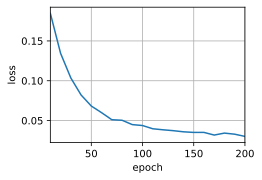

In [14]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 64, 10
lr, num_epochs, device = 0.005, 200, d2l.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)

encoder = TransformerEncoder(len(src_vocab), key_size, query_size, value_size,
                             num_hiddens, norm_shape, ffn_num_input,
                             ffn_num_hiddens, num_heads, num_layers, dropout)
decoder = TransformerDecoder(len(tgt_vocab), key_size, query_size, value_size,
                             num_hiddens, norm_shape, ffn_num_input,
                             ffn_num_hiddens, num_heads, num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

训练结束后，使用 Transformer 模型[**将一些英语句子翻译成法语**]，并且计算它们的 BLEU 分数。


In [15]:
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(
        net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    print(f'{eng} => {translation}, ',
          f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

go . => va !,  bleu 1.000
i lost . => je suis <unk> .,  bleu 0.000
he's calm . => il est calme .,  bleu 1.000
i'm home . => je suis chez moi .,  bleu 1.000


当进行最后一个英语到法语的句子翻译工作时，让我们[**可视化Transformer 的注意力权重**]。编码器自注意力权重的形状为 (编码器层数, 注意力头数, `num_steps`或查询的数目, `num_steps` 或“键－值”对的数目) 。


In [16]:
enc_attention_weights = torch.cat(net.encoder.attention_weights, 0).reshape(
    (num_layers, num_heads, -1, num_steps))
enc_attention_weights.shape

torch.Size([2, 4, 10, 10])

在编码器的自注意力中，查询和键都来自相同的输入序列。因为填充标记是不携带信息的，因此通过指定输入序列的有效长度可以避免查询与使用填充标记的位置计算注意力。接下来，将逐行呈现两层多头注意力的权重。每个注意力头都根据查询、键和值的不同的表示子空间来表示不同的注意力。


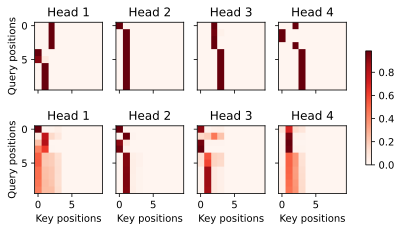

In [17]:
d2l.show_heatmaps(enc_attention_weights.cpu(), xlabel='Key positions',
                  ylabel='Query positions',
                  titles=['Head %d' % i
                          for i in range(1, 5)], figsize=(7, 3.5))

[**为了可视化解码器的自注意力权重和“编码器－解码器”的注意力权重，我们需要完成更多的数据操作工作。**]例如，我们用零填充被遮蔽住的注意力权重。值得注意的是，解码器的自注意力权重和“编码器－解码器”的注意力权重都有相同的查询：即以 *序列开始标记*（beginning-of-sequence, BOS）打头，再与后续输出的标记共同组成序列。


In [18]:
dec_attention_weights_2d = [
    head[0].tolist() for step in dec_attention_weight_seq for attn in step
    for blk in attn for head in blk]
dec_attention_weights_filled = torch.tensor(
    pd.DataFrame(dec_attention_weights_2d).fillna(0.0).values)
dec_attention_weights = dec_attention_weights_filled.reshape(
    (-1, 2, num_layers, num_heads, num_steps))
dec_self_attention_weights, dec_inter_attention_weights = \
    dec_attention_weights.permute(1, 2, 3, 0, 4)
dec_self_attention_weights.shape, dec_inter_attention_weights.shape

(torch.Size([2, 4, 6, 10]), torch.Size([2, 4, 6, 10]))

由于解码器自注意力的自回归属性，查询不会对当前位置之后的“键－值”对进行注意力计算。


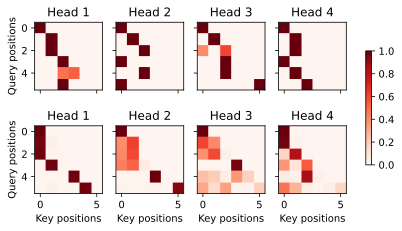

In [19]:
# Plus one to include the beginning-of-sequence token
d2l.show_heatmaps(
    dec_self_attention_weights[:, :, :, :len(translation.split()) + 1],
    xlabel='Key positions', ylabel='Query positions',
    titles=['Head %d' % i for i in range(1, 5)], figsize=(7, 3.5))

与编码器的自注意力的情况类似，通过指定输入序列的有效长度，[**输出序列的查询不会与输入序列中填充位置的标记进行注意力计算**]。


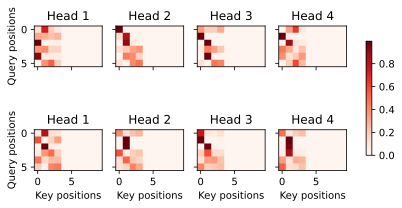

In [20]:
d2l.show_heatmaps(dec_inter_attention_weights, xlabel='Key positions',
                  ylabel='Query positions',
                  titles=['Head %d' % i
                          for i in range(1, 5)], figsize=(7, 3.5))

尽管 Transformer 结构是为了“序列到序列”的学习而提出的，但正如我们将在本书后面提及的那样，Transformer 编码器或 Transformer 解码器通常被单独用于不同的深度学习任务中。

## 小结

* Transformer 是编码器－解码器结构的一个实践，尽管在实际情况中编码器或解码器可以单独使用。
* 在 Transformer 中，多头自注意力用于表示输入序列和输出序列，不过解码器还必须通过遮蔽机制来保留自回归属性。
* Transformer 中的残差连接和层归一化是训练非常深度的模型的重要工具。
* Transformer 模型中基于位置的前馈网络使用同一个多层感知机，作用是对所有的序列位置的表示进行转换。

## 练习

1. 在实验中训练更深的 Transformer 将如何影响训练速度和翻译效果？
1. 在 Transformer 中使用加性注意力取代缩放点积注意力是不是个好办法？为什么？
1. 对于语言模型，我们应该使用 Transformer 的编码器还是解码器，或者两者都用？如何设计？
1. 如果输入序列很长， Transformer 会面临什么挑战？为什么？
1. 如何提高 Transformer 的计算速度和内存使用效率？提示：可以参考论文 :cite:`Tay.Dehghani.Bahri.ea.2020`。
1. 如果不使用卷积神经网络，如何设计基于 Transformer 模型的图像分类任务？提示：可以参考 Vision Transformer :cite:`Dosovitskiy.Beyer.Kolesnikov.ea.2021`。
